In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
History_Data = pd.read_excel('Competition data.xlsx', sheet_name= 'History Data')

In [2]:
History_Data['Hour'] = History_Data['Hour'] - 1

In [3]:
History_Data['Year'] = History_Data['Year'].astype(str)
History_Data['Month'] = History_Data['Month'].astype(str)
History_Data['Day'] = History_Data['Day'].astype(str)
History_Data['Hour'] = History_Data['Hour'].astype(str)
History_Data['Datetime'] = (History_Data['Year']) +'-' + (History_Data['Month']) +'-' + (History_Data['Day']) \
                           + '-' + (History_Data['Hour'])



In [4]:
History_Data= History_Data.dropna()
#History_Data

In [5]:
History_Data.drop('Year', axis =1 , inplace= True)
History_Data.drop('Month', axis =1 , inplace= True)
History_Data.drop('Day', axis =1 , inplace= True)
History_Data.drop('Hour', axis =1 , inplace= True)
History_Data['Timestamp'] = pd.to_datetime(History_Data.Datetime,format='%Y-%m-%d-%H') 

train=History_Data
test=History_Data.iloc[17520:26303,:]

In [6]:
train

,T,Load_kW,Datetime,Timestamp
0,36.0,387190.0,2002-1-1-0,2002-01-01 00:00:00
1,35.0,389977.0,2002-1-1-1,2002-01-01 01:00:00
2,34.0,391881.0,2002-1-1-2,2002-01-01 02:00:00
3,32.0,396362.0,2002-1-1-3,2002-01-01 03:00:00
4,33.0,408553.0,2002-1-1-4,2002-01-01 04:00:00
5,32.0,426902.0,2002-1-1-5,2002-01-01 05:00:00
6,31.0,449139.0,2002-1-1-6,2002-01-01 06:00:00
7,32.0,473425.0,2002-1-1-7,2002-01-01 07:00:00
8,36.0,487921.0,2002-1-1-8,2002-01-01 08:00:00
9,40.0,472487.0,2002-1-1-9,2002-01-01 09:00:00


In [7]:
History_Data.index = History_Data.Timestamp 
train.index = train.Timestamp 
test.index = test.Timestamp 

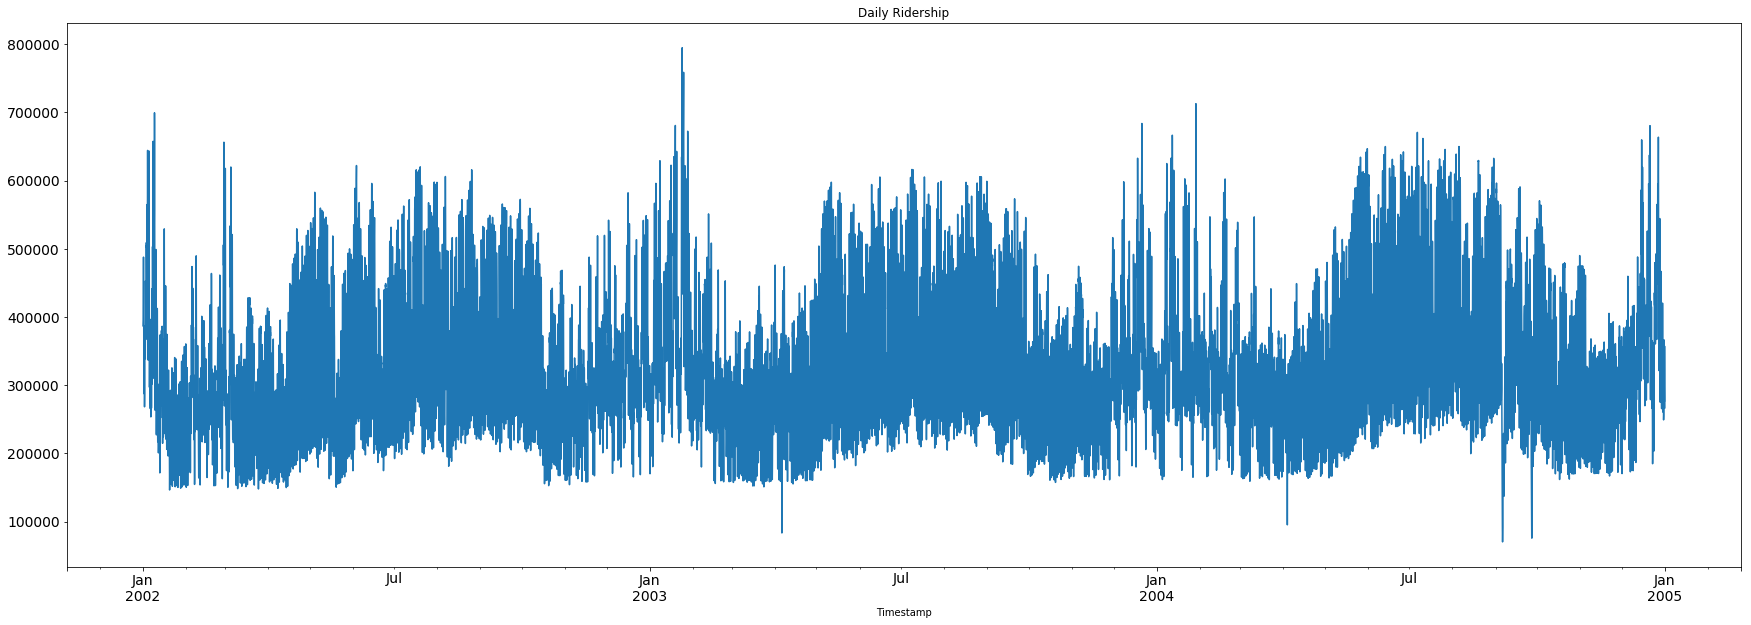

In [9]:
train['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)
#test['Load_kW'].plot(figsize=(30,10), title= 'Daily Ridership', fontsize=14)

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tsa.api

In [34]:
statsmodels.tsa.api.

In [ ]:
%%time
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Load_kW']) ,seasonal_periods= 24*365 ,trend=None, seasonal='additive',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test*2))
plt.figure(figsize=(16,8))

plt.plot(train['Load_kW'], label='Train')
#plt.plot(test['Load_kW'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [37]:
rms = sqrt(mean_squared_error(test['Load_kW'], y_hat_avg['Holt_Winter']))
print(rms)
mape = mean_absolute_percentage_error(test['Load_kW'], y_hat_avg['Holt_Winter'])
print(mape)

91779.2949038047
21.842161831832346
